In [16]:
# This is a Python 3 environment

#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error 

import os

print(os.listdir("../airbnb"))

['.git', '.ipynb_checkpoints', 'airbnb.ipynb', 'bos_calendar.csv', 'bos_listings.csv', 'bos_reviews.csv', 'Price distrubution.png', 'sea_calendar.csv', 'sea_listings.csv', 'sea_reviews.csv']


# #Motivation for Project
I am interested in this project because I have a few friends who have or currently rent their spots out through AirBnb. I would like to be able to present them my findings so they will better be able to maximize their rental business. 

Question 1: What are the main accomodations / features that have affect reservation price the most?
I will be looking at things such as size of room, location, host experiences etc. and how they affect the reservation price rates. Maybe some sort of ratio. 

Question 2: Is there any seasonality in the price? How does time of the year correlate with price? What is the busiest time of the year in Boston & Seattle? 

Question 3: What is the monthly average price/night for the city?  What is the average price/night per neighbourhood? 


In [17]:
#getting the listing dataset for bos and seattle
bos_listings = pd.read_csv('C:/Users/ronjb/Desktop/Udacity/airbnb/bos_listings.csv')
bos_listings = pd.DataFrame(bos_listings)

#find number of listings and number of hosts
bos_listings_count = bos_listings['id'].count()
bos_hosts = len(bos_listings['host_id'].unique())


sea_listings = pd.read_csv('C:/Users/ronjb/Desktop/Udacity/airbnb/sea_listings.csv')
sea_listings = pd.DataFrame(sea_listings)

#find number of listings and number of hosts
sea_listings_count = sea_listings['id'].count()
sea_hosts = len(sea_listings['host_id'].unique())

print('the boston dataset has %d listings by %d hosts.' % (bos_listings_count, bos_hosts))
print('the seattle dataset has %d listings by %d hosts.' % (sea_listings_count, sea_hosts))

the boston dataset has 3585 listings by 2181 hosts.
the seattle dataset has 3818 listings by 2751 hosts.


In [18]:
bos_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [19]:
sea_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [20]:
#Create a smaller dataframe for bos and seattle

columns_loc = ['id', 'neighbourhood', 'neighbourhood_cleansed',
               'zipcode', 'property_type', 'room_type', 'price']

bos_listings_loc = bos_listings[columns_loc]

sea_listings_loc = sea_listings[columns_loc]


bos_listings_loc.head()
#sea_listings_loc.head()

,id,neighbourhood,neighbourhood_cleansed,zipcode,property_type,room_type,price
0,12147973,Roslindale,Roslindale,02131,House,Entire home/apt,$250.00
1,3075044,Roslindale,Roslindale,02131,Apartment,Private room,$65.00
2,6976,Roslindale,Roslindale,02131,Apartment,Private room,$65.00
3,1436513,NaN,Roslindale,NaN,House,Private room,$75.00
4,7651065,Roslindale,Roslindale,02131,House,Private room,$79.00


In [21]:
sea_listings_loc.head()

,id,neighbourhood,neighbourhood_cleansed,zipcode,property_type,room_type,price
0,241032,Queen Anne,West Queen Anne,98119,Apartment,Entire home/apt,$85.00
1,953595,Queen Anne,West Queen Anne,98119,Apartment,Entire home/apt,$150.00
2,3308979,Queen Anne,West Queen Anne,98119,House,Entire home/apt,$975.00
3,7421966,Queen Anne,West Queen Anne,98119,Apartment,Entire home/apt,$100.00
4,278830,Queen Anne,West Queen Anne,98119,House,Entire home/apt,$450.00


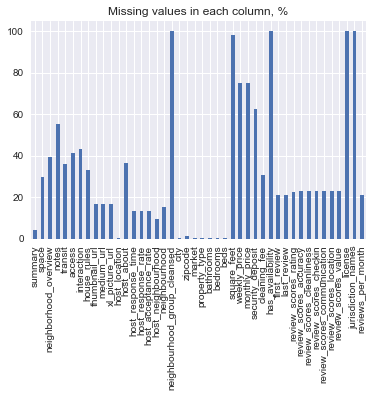

In [22]:
# Finding the na / missing values for each column and visualize
bos_listings_na = bos_listings.isnull().mean()*100
bos_listings_col_na = bos_listings_na[bos_listings_na > 0]

bos_listings_col_na.plot.bar(title='Missing values in each column, %')

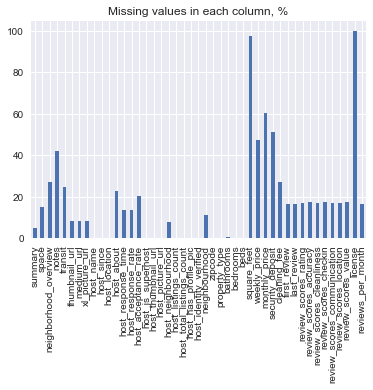

In [23]:
# Finding the na / missing values for each column and visualize
sea_listings_na = sea_listings.isnull().mean()*100
sea_listings_col_na = sea_listings_na[sea_listings_na > 0]

sea_listings_col_na.plot.bar(title='Missing values in each column, %')

In [24]:
#getting the bos calendar dataset
bos_calender = pd.read_csv('C:/Users/ronjb/Desktop/Udacity/airbnb/bos_calendar.csv')
bos_calender = pd.DataFrame(bos_calender)
bos_calender.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [25]:
#getting the seattle calendar dataset
sea_calender = pd.read_csv('C:/Users/ronjb/Desktop/Udacity/airbnb/sea_calendar.csv')
sea_calender = pd.DataFrame(sea_calender)
sea_calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


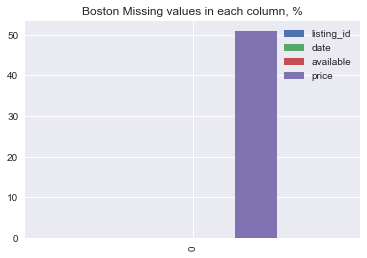

In [26]:
# Finding the bos na / missing values for each column and then visualize
bos_calendar_na = pd.DataFrame([bos_calender.isnull().mean()*100])

bos_calendar_na.plot.bar(title='Boston Missing values in each column, %')

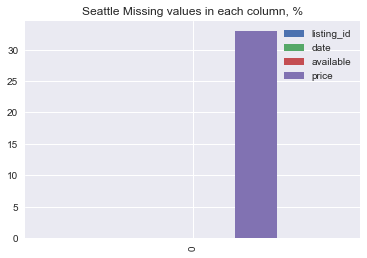

In [27]:
# Finding the sea na / missing values for each column and then visualize
sea_calendar_na = pd.DataFrame([sea_calender.isnull().mean()*100])

sea_calendar_na.plot.bar(title='Seattle Missing values in each column, %')

In [28]:
#Functions used for data cleaning 

import time
start = time.time()

"the code you want to test stays here"



def monthh(row):
    ''' Getting the month from date represented as a string '''
    return int(row['date'].split('-')[1])

def yearr(row):
    ''' Getting the year from date represented as a string '''
    return int(row['date'].split('-')[0])

def hostt(row):
    ''' Getting the year from a date represented as a string '''
    try:
        host_since = int(row['host_since'].split('-')[0])
    except:
        host_since = np.nan
    return host_since
def get_val_from_list(row, column_name, value):
    ''' dummy column for values '''
    val = 0.0
    try:
        vals = row[column_name].replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(',')
        if value in vals:
            val = 1.0
    except:
        val = 0.0
    return val

def col_split(Clean_DataFrame, column_name, max_dummies_num = 10):
    ''' Splitting the values in columns, which contain lists (like, amenities) '''
    
    # Now getting the unique value dictionary
    values_dict = {}

    for unique_value in Clean_DataFrame[column_name].unique(): 
        for value in unique_value.replace('[', '').replace("'", '').replace("]", '').replace('"', '').replace('{', '').replace('}', '').split(','):
            if value in values_dict:
                values_dict[value] = values_dict[value] + 1
            else:
                values_dict[value] = 0
                
    values_sorted = sorted(values_dict.items(), key=lambda kv: kv[1], reverse = True)
       # split into columns
    for value in values_sorted[: max_dummies_num]:
        Clean_DataFrame[column_name + '_' + value[0]] = Clean_DataFrame.apply(lambda row: get_val_from_list(row, column_name, value[0]),axis=1)
        
    return

def fee_if_extra_guest(row):
    ''' Return 1 for exatra people fee'''
    if row['extra_people'] == '$0.00':
        return 0.0
    else:
        return 1.0

#Cleaning function
def cleaning_data(bos_listings, bos_calender):
    '''
    Input values are as :
    bos listings_dataset - It is the dataframe which has listings data 
    bos_calender - It is the dataframe which has calendar data
    Output values are as
    Clean_DataFrame - cleaned dataset, which has the merged tables in which:
    (i)  The missing values are imputed with mean or mode.
    (ii) The irrelevant columns are dropped.
    (iii)The string containing dates are converted into numbers.
    (iv) The columns, containing lists, are split into several columns (like, amenities)
    '''
    #Now we merge both the datasets
    bos_listings = bos_listings.rename(index=str, columns={"id": "listing_id"})
    Clean_DataFrame = pd.merge(bos_calender, bos_listings, on = 'listing_id')
    
    #df = df.drop(axis=1, labels=list)
    #https://stackoverflow.com/questions/28538536/deleting-multiple-columns-based-on-column-names-in-pandas
    #yourdf.drop(['columnheading1', 'columnheading2'], axis=1, inplace=True)
    #dropping the irrelevant columns
    drop_col = ['available', 'host_id','host_location','host_acceptance_rate','host_neighbourhood',
                   'host_total_listings_count', 'weekly_price', 'monthly_price',
                   'security_deposit', 'cleaning_fee', 'calendar_updated',
                   'listing_url','last_scraped' ,'scrape_id', 'name', 'summary', 'space', 'description',
                   'experiences_offered', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'zipcode',
                   'neighborhood_overview', 'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
                   'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url', 'host_picture_url',
                   'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude',
                   'is_location_exact', 'square_feet', 'has_availability', 'availability_30',
                   'availability_60', 'availability_90', 'availability_365', 'calendar_last_scraped',
                  'first_review', 'last_review', 'requires_license', 'license', 'jurisdiction_names', 'price_y',
                  'reviews_per_month']
    
    Clean_DataFrame = Clean_DataFrame.drop(axis = 1, labels = drop_col)
     #converting the date from the calendar dataset into month and drop the date column
        
    Clean_DataFrame['month'] = Clean_DataFrame.apply(lambda row: monthh(row),axis=1)
    Clean_DataFrame['year'] = Clean_DataFrame.apply(lambda row: yearr(row),axis=1)
    

    #Clean_DataFrame = Clean_DataFrame.drop(labels = 'date')
    
    #df = pd.DataFrame.drop('Meter ID', axis=1)
    
    #removing the rows where price_x == nan, because price will be used as response column
    Clean_DataFrame = Clean_DataFrame.dropna(subset=['price_x'])
    
    #converting the price to number and drop the price_x column
    Clean_DataFrame['price'] = Clean_DataFrame['price_x'].astype(str)
    Clean_DataFrame['price'] = Clean_DataFrame['price'].str.replace("[$, ]", "").astype("float")
    #Clean_DataFrame = Clean_DataFrame.drop(columns = ['price_x'])
    
    #converting the host_since date into number and filling the missing values and then drop the original column
    Clean_DataFrame['host_since_year'] = Clean_DataFrame.apply(lambda row: hostt(row),axis=1)
    Clean_DataFrame['host_since_year'].fillna(Clean_DataFrame['host_since_year'].mean(), inplace = True)
    #Clean_DataFrame = Clean_DataFrame.drop(columns = ['host_since'])
    
    #converting the host_response_rate into number and filling the missing values and then drop the original column
    Clean_DataFrame['host_response_rate_num'] = Clean_DataFrame['host_response_rate'].astype(str)
    Clean_DataFrame['host_response_rate_num'] = Clean_DataFrame['host_response_rate_num'].str.replace("%", "").astype("float")
    Clean_DataFrame['host_response_rate_num'].fillna(Clean_DataFrame['host_response_rate_num'].mean(), inplace = True) 
    Clean_DataFrame['host_response_rate_buckets'] = pd.qcut(Clean_DataFrame['host_response_rate_num'], 5, labels=False, duplicates = 'drop')
    
    #Clean_DataFrame = Clean_DataFrame.drop(columns = ['host_response_rate', 'host_response_rate_num'])
      #filling the missing values with mean value for host_listings_count
    Clean_DataFrame['host_listings_count'].fillna(Clean_DataFrame['host_listings_count'].mean(), inplace = True)
    
    #splitting the host_verifications into dummy columns and drop the original column
    col_split(Clean_DataFrame, 'host_verifications')
    #Clean_DataFrame = Clean_DataFrame.drop(columns = ['host_verifications'])
    
    #filling the missing values for bathrooms, bedrooms and beds with mode
    Clean_DataFrame['bathrooms'] = Clean_DataFrame['bathrooms'].fillna(Clean_DataFrame['bathrooms'].mode()[0])
    Clean_DataFrame['bedrooms'] = Clean_DataFrame['bedrooms'].fillna(Clean_DataFrame['bedrooms'].mode()[0])
    Clean_DataFrame['beds'] = Clean_DataFrame['beds'].fillna(Clean_DataFrame['beds'].mode()[0])
    
    #splitting the amenities into dummy columns and drop the original column
    col_split(Clean_DataFrame, 'amenities')
    #Clean_DataFrame = Clean_DataFrame.drop(columns = ['amenities'])
    
    #converting the extra people fee into binar, y column (1 for if fee for extra people is charged, else 0)
    Clean_DataFrame['extra_people_fee'] = Clean_DataFrame.apply(lambda row: fee_if_extra_guest(row),axis=1)
    #Clean_DataFrame = Clean_DataFrame.drop(columns = ['extra_people'])
    
    
    
    drop_col2 = ['date', 'price_x', 'host_since', 'host_verifications', 'amenities', 'extra_people',
                'host_response_rate', 'host_response_rate_num', 'host_verifications']
    Clean_DataFrame = Clean_DataFrame.drop(axis = 1, labels = drop_col2)
    
    
    #filling the missing values for review scores columns
    review_scores_col = ['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                         'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
                        'review_scores_value']
    for column in review_scores_col:
        Clean_DataFrame[column].fillna(Clean_DataFrame[column].mean(), inplace = True)
    
    return Clean_DataFrame

end = time.time()
print(end - start)

#  .0009963512420654297 seconds usually

0.0009982585906982422


In [29]:
#Clean dataset
#Takes an average of about 276.5 seconds

import time
start = time.time()

Bos_Clean_DataFrame = cleaning_data(bos_listings, bos_calender)


end = time.time()
print(end - start)

321.8788273334503


# Analytics
# Right here we are finding the listings as per their price.

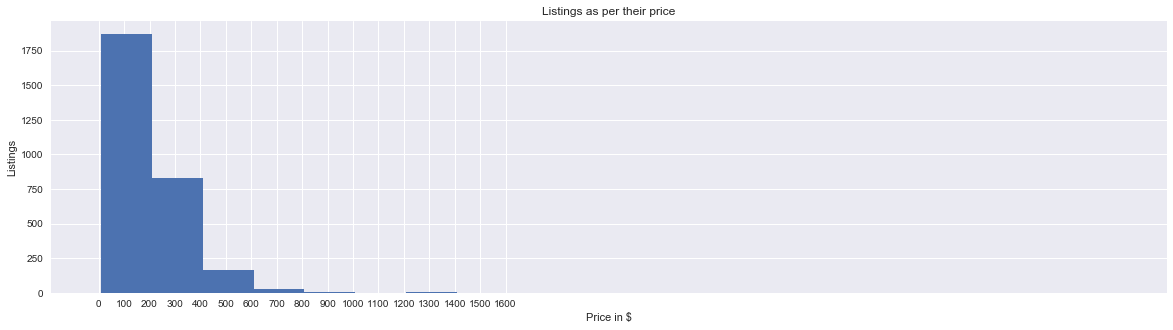

In [30]:
import time
start = time.time()

#First find the average price of listings and then plot
Bos_Average_Price_Listings = Bos_Clean_DataFrame.groupby('listing_id').mean()['price']
#Plot
plt.figure(figsize=(20,5))
plt.hist(Bos_Average_Price_Listings, bins=20)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Listings')
plt.xlabel('Price in $')
plt.title('Listings as per their price')
plt.savefig('Price distrubution.png')
plt.show()


end = time.time()
#start = time.time()print(end - start)

In [31]:
start = time.time()
#minimum, maximum and average prices exploration
Bos_minimum_price = Bos_Clean_DataFrame['price'].min()
Bos_maximum_price = Bos_Clean_DataFrame['price'].max()
Bos_average_price = Bos_Clean_DataFrame['price'].mean()

print('Minimum price  %d$.' % (Bos_minimum_price))
print('Maximum price  %d$' % (Bos_maximum_price))
print('Average price  %d$.' % (Bos_average_price))

end = time.time()
print(end - start)

Minimum price  11$.
Maximum price  7163$
Average price  198$.
0.011968135833740234


In [33]:
#Average takes about 395 seconds ~7 minutes

start = time.time()

Sea_Clean_DataFrame = cleaning_data(sea_listings, sea_calender)
end = time.time()
print(end - start)

414.7724747657776


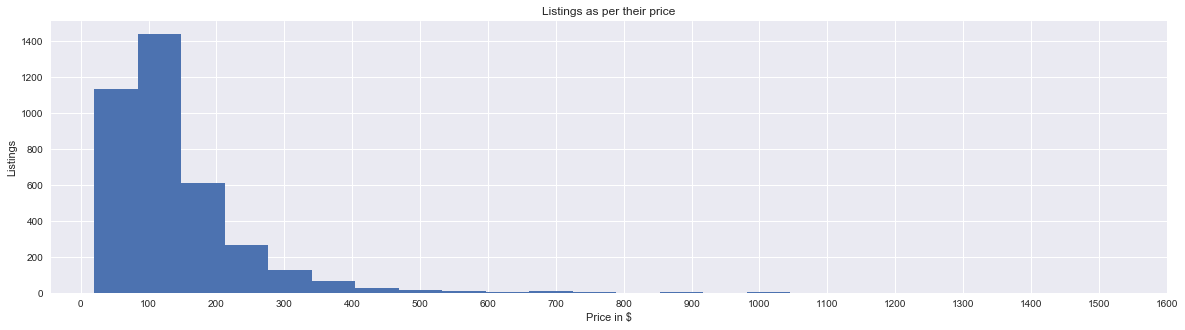

In [36]:
import time
start = time.time()

#First find the average price of listings and then plot
Sea_Average_Price_Listings = Sea_Clean_DataFrame.groupby('listing_id').mean()['price']
#Plot
plt.figure(figsize=(20,5))
plt.hist(Sea_Average_Price_Listings, bins=20)
plt.xticks(np.arange(0, 1700, step=100))
plt.ylabel('Listings')
plt.xlabel('Price in $')
plt.title('Listings as per their price')
plt.savefig('Price distrubution.png')
plt.show()


end = time.time()
#start = time.time()print(end - start)

In [37]:
start = time.time()
#minimum, maximum and average prices exploration
Sea_minimum_price = Sea_Clean_DataFrame['price'].min()
Sea_maximum_price = Sea_Clean_DataFrame['price'].max()
Sea_average_price = Sea_Clean_DataFrame['price'].mean()

print('Minimum price  %d$.' % (Sea_minimum_price))
print('Maximum price  %d$' % (Sea_maximum_price))
print('Average price  %d$.' % (Sea_average_price))

end = time.time()
print(end - start)

Minimum price  10$.
Maximum price  1650$
Average price  137$.
0.01792001724243164


## Question 2: What are the features that affect the prices?


Answer: For this we take out some coumns that are numeric incuding 'price' from the Clean_DataFrame and then find the correation between them. I use Heatmap graph for visualizing the correlation

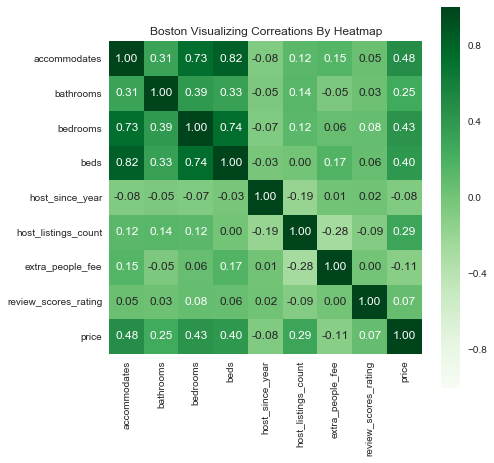

In [50]:
#Now get the coulumn that are used for correlation
Bos_Correlation_columns = ['accommodates','bathrooms','bedrooms','beds','host_since_year',
        'host_listings_count', 'extra_people_fee',
        'review_scores_rating', 'price']

#correlation between columns 
Bos_coffecient_corr = np.corrcoef(Bos_Clean_DataFrame[Bos_Correlation_columns].values.T)
#Heatmap
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
Bos_heatmap_fig = sns.heatmap(Bos_coffecient_corr, cbar = True, annot=True, square = True, fmt = '.2f', cmap="Greens",
              yticklabels = Bos_Correlation_columns, xticklabels = Bos_Correlation_columns).set_title('Boston Visualizing Correations By Heatmap')

Bos_fig = Bos_heatmap_fig.get_figure()
Bos_fig.savefig('correlations.png')

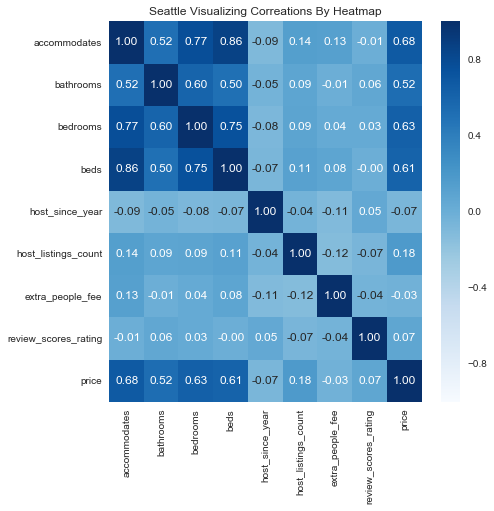

In [53]:
#Now get the coulumn that are used for correlation
Sea_Correlation_columns = ['accommodates','bathrooms','bedrooms','beds','host_since_year',
        'host_listings_count', 'extra_people_fee',
        'review_scores_rating', 'price']

#correlation between columns 
Sea_coffecient_corr = np.corrcoef(Sea_Clean_DataFrame[Sea_Correlation_columns].values.T)
#Heatmap
sns.set(font_scale=1)
sns.set(rc={'figure.figsize':(7,7)})
Sea_heatmap_fig = sns.heatmap(Sea_coffecient_corr, cbar = True, annot=True, square = False, fmt = '.2f', cmap="Blues",
              yticklabels = Sea_Correlation_columns, xticklabels = Sea_Correlation_columns).set_title('Seattle Visualizing Correations By Heatmap')

Sea_fig = Sea_heatmap_fig.get_figure()
Sea_fig.savefig('correlations.png')

## Categorical Data

In [69]:
Bos_categorical_col = list(Bos_Clean_DataFrame.select_dtypes(include=['object']).columns)
    
for col in  Bos_categorical_col:
    Bos_Clean_DataFrame = pd.concat([Bos_Clean_DataFrame.drop(col, axis=1), 
    pd.get_dummies(Bos_Clean_DataFrame[col], prefix=col, prefix_sep='_',
    drop_first=True, dummy_na=True)], axis=1)
    
#drop columns

drop_col3 = ['listing_id', 'year']
Bos_Clean_DataFrame = Bos_Clean_DataFrame.drop(axis = 1, labels = drop_col3)


In [73]:
start = time.time()
#Train and Test split

drop_col3 = ['price']

X = Bos_Clean_DataFrame.drop(axis = 1, labels = drop_col3)
y = Bos_Clean_DataFrame[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


end = time.time()
print(end - start)

In [ ]:
start = time.time()

#XGBoost model : Train XGBoost model to predict the price.

Bos_model = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
Bos_model.fit(X_train,y_train)

# print scores 
Bos_predict_y_train = Bos_model.predict(X_train)
Bos_predict_y_test = Bos_model.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, predict_y_train),
        mean_squared_error(y_test, predict_y_test)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, predict_y_train),
        r2_score(y_test, predict_y_test)))



end = time.time()
print(end - start)

## Feature importances from the XGBoost model


In [ ]:
headers = ["Name", "Score"]
values = sorted(zip(X_train.columns, model.feature_importances_), key=lambda x: x[1] * -1)
model_feature_importances = pd.DataFrame(values, columns = headers)

#plot top 15 features, feature importances
top_features = model_feature_importances['name'][:15]
arrange_y = np.arange(len(top_features))
total_scores = model_feature_importances['Score'][:15]
 
plt.figure(figsize=(10,5))
plt.bar(arrange_y, total_scores, align='center', alpha=0.5)
plt.xticks(arrange_y, top_features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature Importance of XGBoost Model')

plt.savefig('Feature Importances XGB.png')
 
plt.show()

In [ ]:
# Feature importances from the XGBoost model


headers = ["name", "score"]
values = sorted(zip(X_train.columns, model.feature_importances_), key=lambda x: x[1] * -1)
model_feature_importances = pd.DataFrame(values, columns = headers)

#plot top 15 features, feature importances
top_features = model_feature_importances['name'][:15]
arrange_y = np.arange(len(top_features))
total_scores = model_feature_importances['score'][:15]
 
plt.figure(figsize=(10,5))
plt.bar(arrange_y, total_scores, align='center', alpha=0.5)
plt.xticks(arrange_y, top_features, rotation='vertical')
plt.ylabel('Score')
plt.xlabel('Features')
plt.title('Feature importances of Model (XGBoost)')

plt.savefig('feature importances XGB.png')
 
plt.show()


Here, the conclusion after modelling also says that factors that we found out in our analysis part above are influencing price rates. These features are listed below:
time of the year, location,
number of bedrooms, bathrooms, beds and
accomodates
number of host's listings,
number of reviews and review scores ratings
extra guests
Location in review 
number of years since they are the host,
time in which the host responds to the inquiries

In [ ]:
#120Seattle Data Below

## Question 2: What are the changes in price according to seasons? 

Answer: For this I get two years data that of 2016 gives the cear view . That summer has reativey ow prices than winter season. 

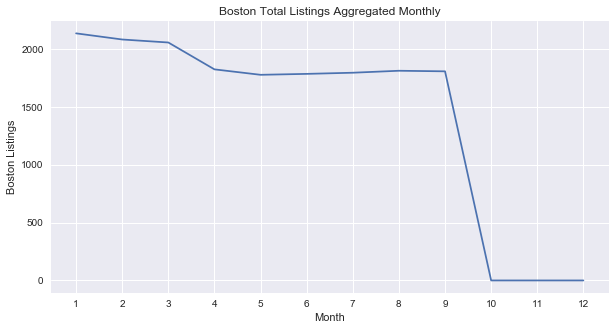

In [63]:
#listings for each month in 2017
Bos_total_listings_monthly = pd.Series([12])
for i in range(1, 13):
    Bos_total_listings_monthly[i] = len(Bos_Clean_DataFrame[(Bos_Clean_DataFrame['month'] == i) 
    & (Bos_Clean_DataFrame['year'] == 2017)]['listing_id'].unique())
    
Bos_total_listings_monthly = Bos_total_listings_monthly.drop(0)

#plot
plt.figure(figsize=(10,5))
plt.plot(Bos_total_listings_monthly)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Boston Listings')
plt.xlabel('Month')
plt.title('Boston Total Listings Aggregated Monthly')

plt.savefig('Number of Available Boston Listings.png')

plt.show()

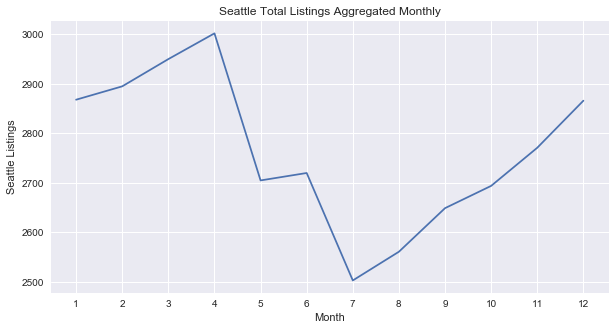

In [65]:
#listings for each month in 2016
Sea_total_listings_monthly = pd.Series([12])
for i in range(1, 13):
    Sea_total_listings_monthly[i] = len(Sea_Clean_DataFrame[(Sea_Clean_DataFrame['month'] == i) & (Sea_Clean_DataFrame['year'] == 2016)]['listing_id'].unique())
    
Sea_total_listings_monthly = Sea_total_listings_monthly.drop(0)

#plot
plt.figure(figsize=(10,5))
plt.plot(Sea_total_listings_monthly)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Seattle Listings')
plt.xlabel('Month')
plt.title('Seattle Total Listings Aggregated Monthly')

plt.savefig('Number of Available Seattle Listings.png')

plt.show()